In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set_theme(context='paper', style='whitegrid', palette="viridis",
              font='Hack', font_scale=2)


In [13]:
df = pd.read_csv("./target/micrometer.csv", dtype={"name": "string"})
df["end_bkt"] = df["end"] - (df["end"] % 1.0)
# df["name"] = df["name"].replace({"map_async_call": "map", "map_async_next": "next"})
df = df.sort_values(["experiment", "name"], ascending=[True, True])
###
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90377 entries, 0 to 90376
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       90377 non-null  int64  
 1   experiment  90377 non-null  object 
 2   name        90377 non-null  string 
 3   thread      90377 non-null  int64  
 4   count       90377 non-null  int64  
 5   time        90377 non-null  float64
 6   end         90377 non-null  float64
 7   end_bkt     90377 non-null  float64
dtypes: float64(3), int64(3), object(1), string(1)
memory usage: 5.5+ MB
None


In [14]:
# from matplotlib.ticker import LogLocator, NullFormatter


def ticks(fig=None):
    # locmin = LogLocator(base=10, subs=np.arange(0.2,1,0.2), numticks=5)
    
    fig = fig or plt.gcf()
    
    for ax in fig.axes:
        ax.grid(True, which="major", c='lightgray')
        ax.grid(True, which="minor", c='whitesmoke')
        # ax = plt.gca()
        # if x:
        #     ax.xaxis.set_minor_locator(locmin)
        #     ax.xaxis.set_minor_formatter(NullFormatter())

        # if y:
        #     ax.yaxis.set_minor_locator(locmin)
        #     ax.yaxis.set_minor_formatter(NullFormatter())

In [15]:
# readable = df[["memo", "lambda", "name", "time"]].groupby(["memo", "lambda", "name"]).aggregate(['mean', 'min', 'max', 'var', 'std']).droplevel(level=0, axis=1).reset_index()
# readable.to_csv("./target/mm-readable.csv")

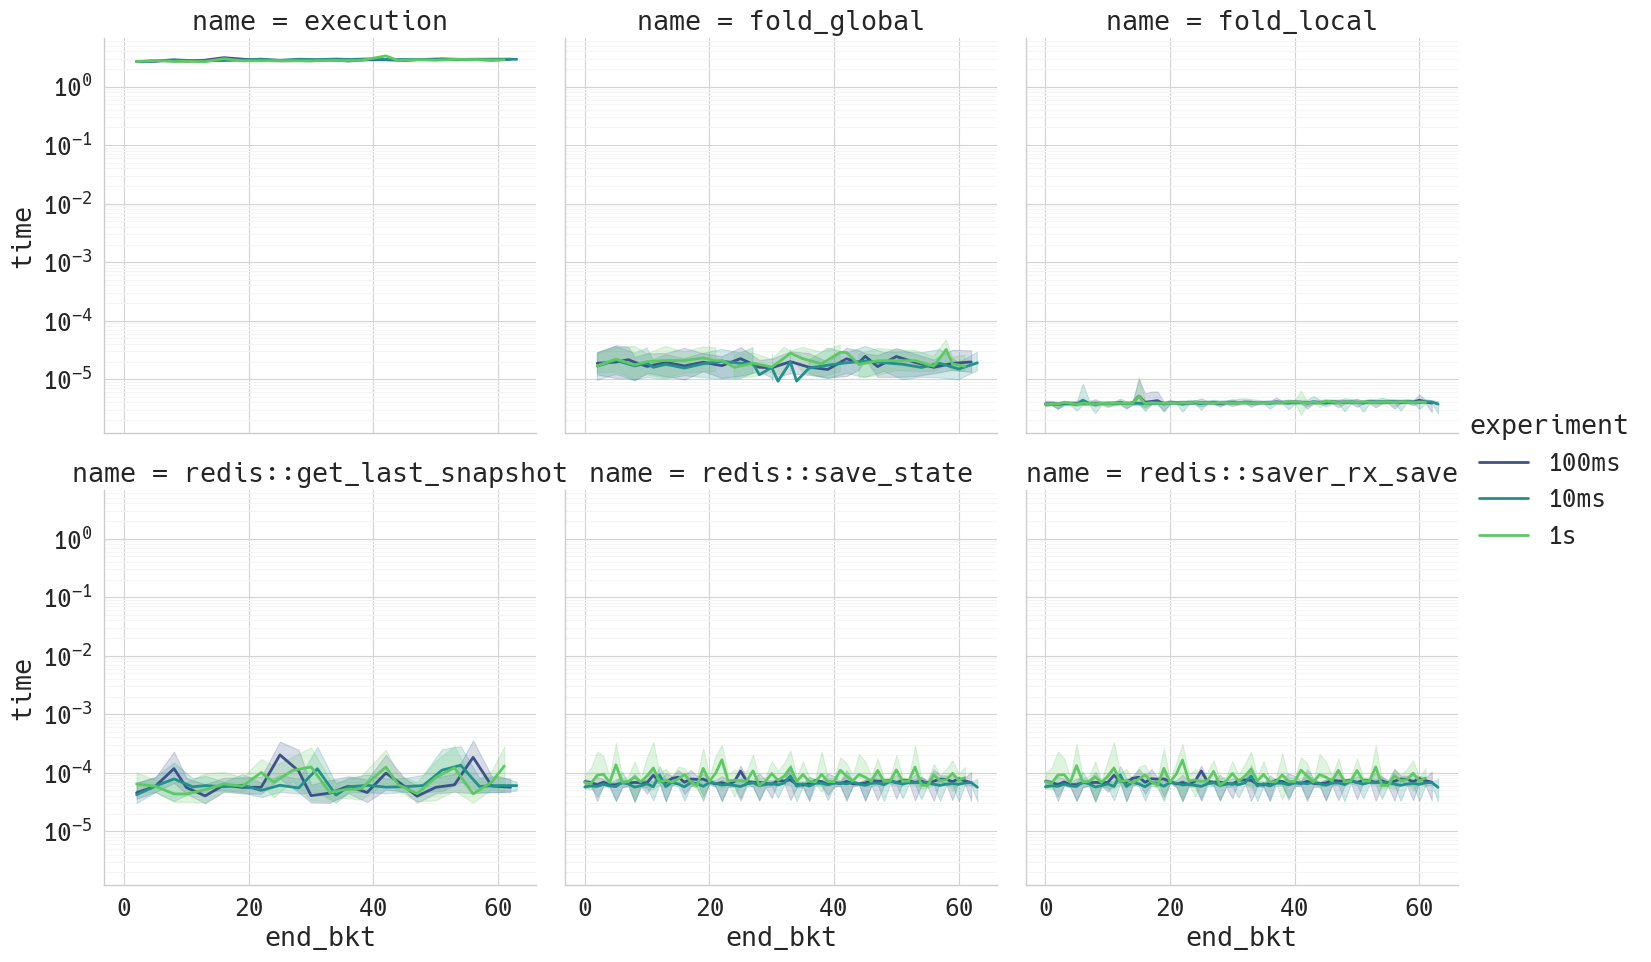

In [16]:
# plt.tight_layout()
g = sns.relplot(data=df, x="end_bkt", y="time", hue="experiment",
                col="name", col_wrap=3, kind="line", err_style="band",
                markers=False, errorbar=('pi', 90), linewidth=2, palette="viridis")
# g.set_titles(template="{row_name} (λ: {col_name})")
plt.semilogy()
ticks()
plt.savefig("./target/mm-line.pdf", bbox_inches="tight")


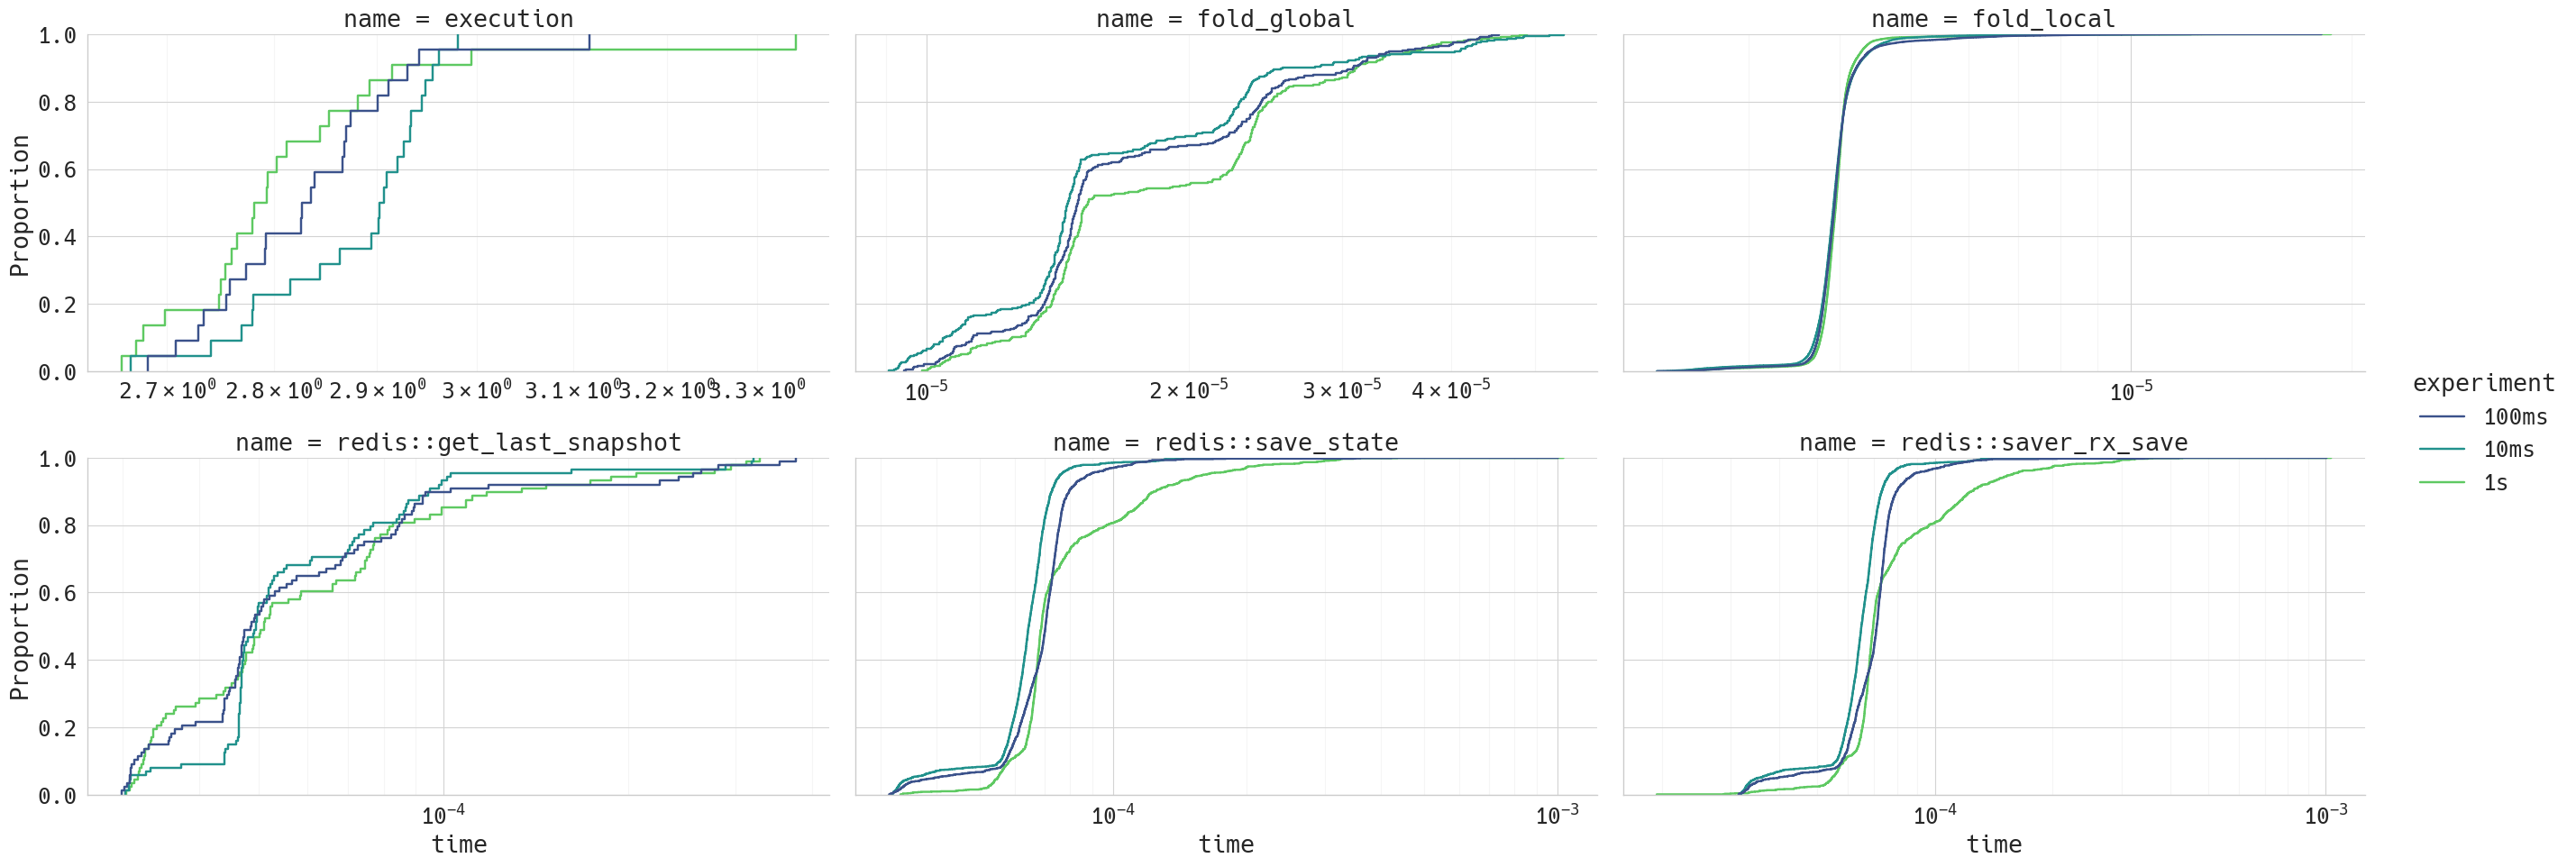

In [17]:
# norm = plt.Normalize(df["memo_log2"].min(), df["memo_log2"].max())
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.displot(data=df, x="time", hue="experiment", col="name", col_wrap=3, kind="ecdf", log_scale=(True, False),
                linewidth=1.75, facet_kws={"sharex": False}, palette="viridis", aspect=1.8, legend=True)
# g.set_titles(template="{row_name} (λ: {col_name})")
# g.figure.colorbar(sm, ax=g.axes, shrink=0.8)
ticks(g.figure)
plt.savefig("target/mm-ecdf-log.pdf", bbox_inches="tight")

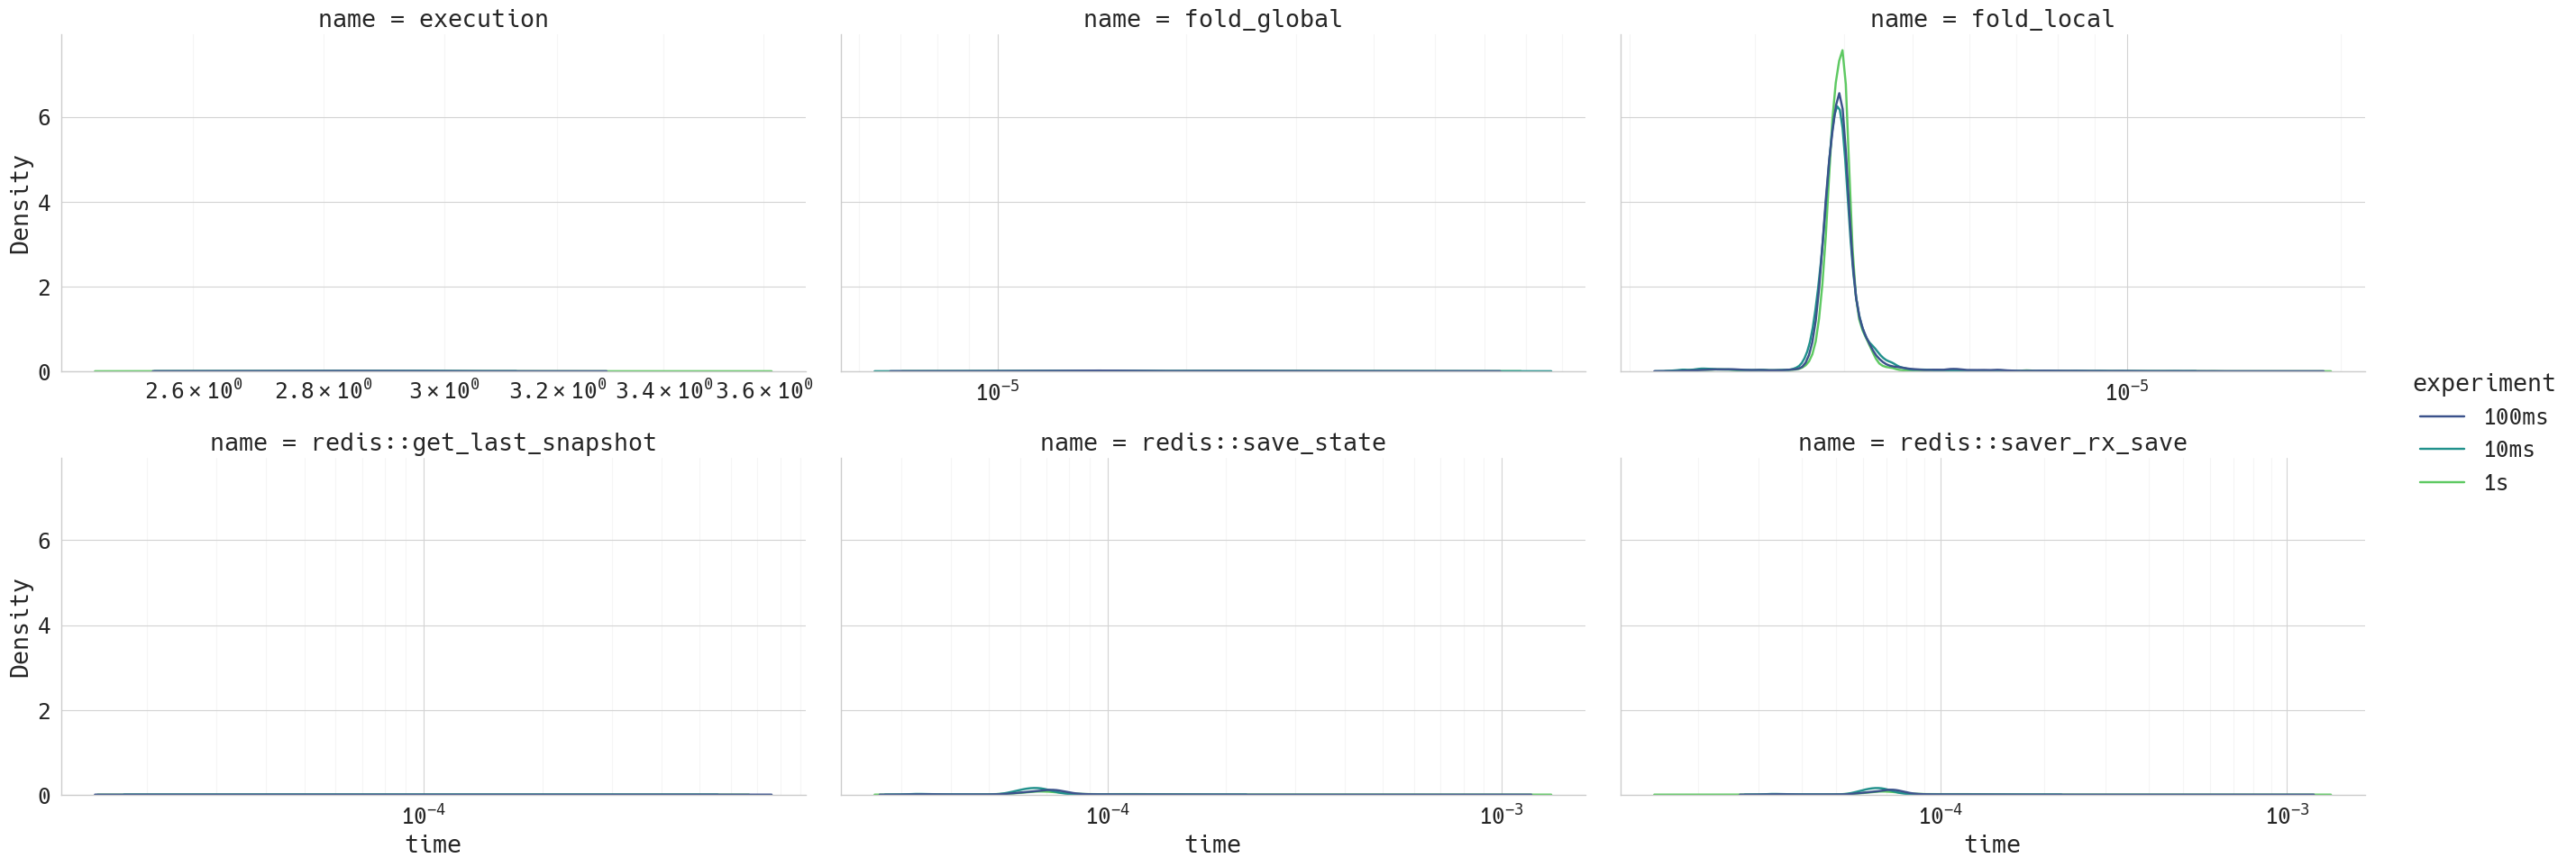

In [18]:
# norm = plt.Normalize(df["memo_log2"].min(), df["memo_log2"].max())
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
g = sns.displot(data=df, x="time", hue="experiment", col="name", col_wrap=3, kind="kde", log_scale=(True, False),
                linewidth=1.75, facet_kws={"sharex": False}, palette="viridis", aspect=1.8, legend=True)
# g.set_titles(template="{row_name} (λ: {col_name})")
# g.figure.colorbar(sm, ax=g.axes, shrink=0.8)
ticks(g.figure)
plt.savefig("target/mm-kde-log.pdf", bbox_inches="tight")

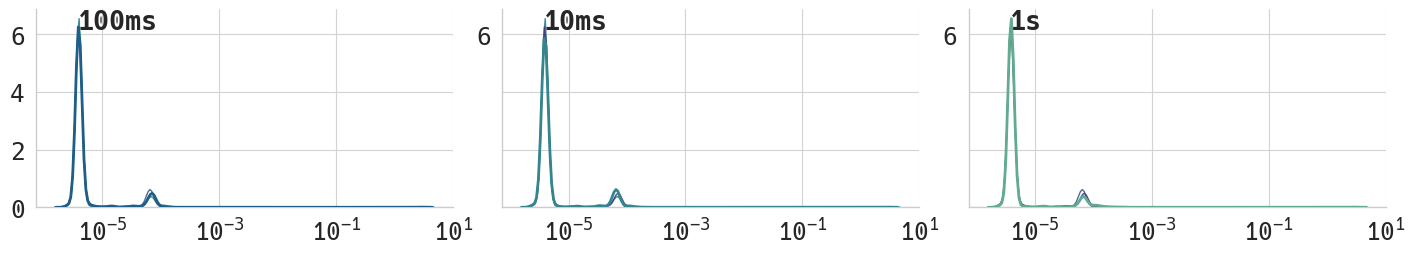

In [19]:
g = sns.displot(
    data=df,
    x="time",
    hue="experiment", col="experiment", col_wrap=3,
    kind="kde", palette="crest_r", linewidth=2, zorder=5,
    height=3, aspect=1.615, legend=False, log_scale=(True, False), common_norm=False
)
ticks()

# Iterate over each subplot to customize further
for var, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.1, .9, var, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.kdeplot(
        data=df, x="time", hue="experiment",
        alpha=0.9, color="lightgray", linewidth=1, ax=ax, legend=False, log_scale=(True, False), common_norm=False
    )

# Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "")
g.tight_layout()
plt.savefig("./target/mm-facet.pdf", bbox_inches="tight")
